In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train-data/train_v9rqX0R.csv
/kaggle/input/test-data/test_AbJTz2l.csv
/kaggle/input/submission-csv/sample_submission_8RXa3c6.csv


GPT-4o
The Big Mart Sales Prediction Problem is a popular machine learning problem, often used in hackathons and competitions like those on Kaggle. It involves predicting the sales of products in various stores based on historical data. Below are the details of the problem:

Problem Statement
The goal is to predict the sales of products (referred to as Item_Outlet_Sales) in different stores (referred to as outlets) based on various features of the products and stores. The dataset typically contains information about the products, stores, and their historical sales.



In [4]:
import pandas as pd 
import numpy as np 
import os 
train_data = pd.read_csv("/kaggle/input/train-data/train_v9rqX0R.csv")
test_data = pd.read_csv("/kaggle/input/test-data/test_AbJTz2l.csv")

In [5]:
print(len(train_data.columns))
print(len(test_data.columns))

12
11


This Python function handles missing values in a dataset by filling numerical columns (Item_Weight, Item_Visibility, Item_MRP) with their mean and categorical columns (Item_Fat_Content, Item_Type, Outlet_Size, etc.) with their mode. It first checks for missing values, imputes them accordingly, and verifies that no NaN values remain. The function ensures data integrity by working on a copy of the DataFrame and provides detailed feedback on the imputation process. After cleaning, the dataset is free of missing values, making it ready for further analysis or modeling. This approach is ideal for preprocessing datasets like the Big Mart Sales dataset.

In [6]:
import pandas as pd
import numpy as np

def handle_missing_values_thoroughly(df):
    df = df.copy()
    
    # 1. Check for NaN values in each column
    print("Missing values before handling:")
    print(df.isnull().sum())
    
    # 2. Handle numerical columns
    numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
    for col in numerical_columns:
        if df[col].isnull().any():
            mean_value = df[col].mean()
            df[col] = df[col].fillna(mean_value)
            print(f"\nFilled {col} NaN with mean: {mean_value:.4f}")
    
    # 3. Handle categorical columns
    categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 
                         'Outlet_Location_Type', 'Outlet_Type']
    for col in categorical_columns:
        if df[col].isnull().any():
            mode_value = df[col].mode()[0]
            df[col] = df[col].fillna(mode_value)

            
            
            print(f"\nFilled {col} NaN with mode: {mode_value}")
    
    # 4. Verify no NaN values remain
    remaining_nan = df.isnull().sum().sum()
    if remaining_nan > 0:
        print(f"\nWarning: {remaining_nan} NaN values still remain in:")
        print(df.isnull().sum()[df.isnull().sum() > 0])
    else:
        print("\nAll NaN values have been handled successfully!")
    
    return df

# Clean the data
print("Step 1: Initial Data Shape:", train_data.shape)
print("\nStep 2: Checking data types:")
print(train_data.dtypes)

train_data_clean = handle_missing_values_thoroughly(train_data)

print("\nStep 3: Final verification - Any remaining NaN values?")
print(train_data_clean.isnull().sum())

# Display sample of cleaned data
print("\nStep 4: Sample of cleaned data:")
print(train_data_clean)

# Additional verification
print("\nStep 5: Final verification - Total NaN values:", train_data_clean.isnull().sum().sum())

Step 1: Initial Data Shape: (8523, 12)

Step 2: Checking data types:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object
Missing values before handling:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Filled Item_Weight 

In [7]:
train_data_clean

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


The provided code generates insightful visualizations to analyze the train_data_clean dataset. A violin plot shows the distribution of Item_Outlet_Sales across Outlet_Type, highlighting variations. A pairplot explores pairwise relationships between numerical variables like Item_Weight, Item_Visibility, Item_MRP, and Item_Outlet_Sales, grouped by Item_Fat_Content. A regression plot examines the linear relationship between Item_MRP and Item_Outlet_Sales, while a distribution plot visualizes the spread of Item_Outlet_Sales with a histogram and KDE. Lastly, a residual plot evaluates the fit of the regression model by plotting residuals of Item_MRP against Item_Outlet_Sales. These graphs provide a comprehensive data overview.

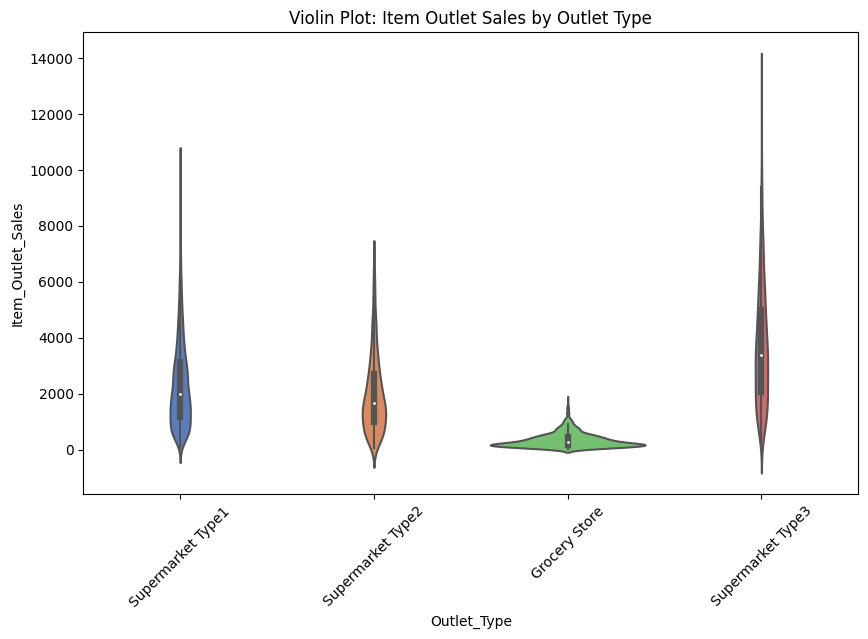

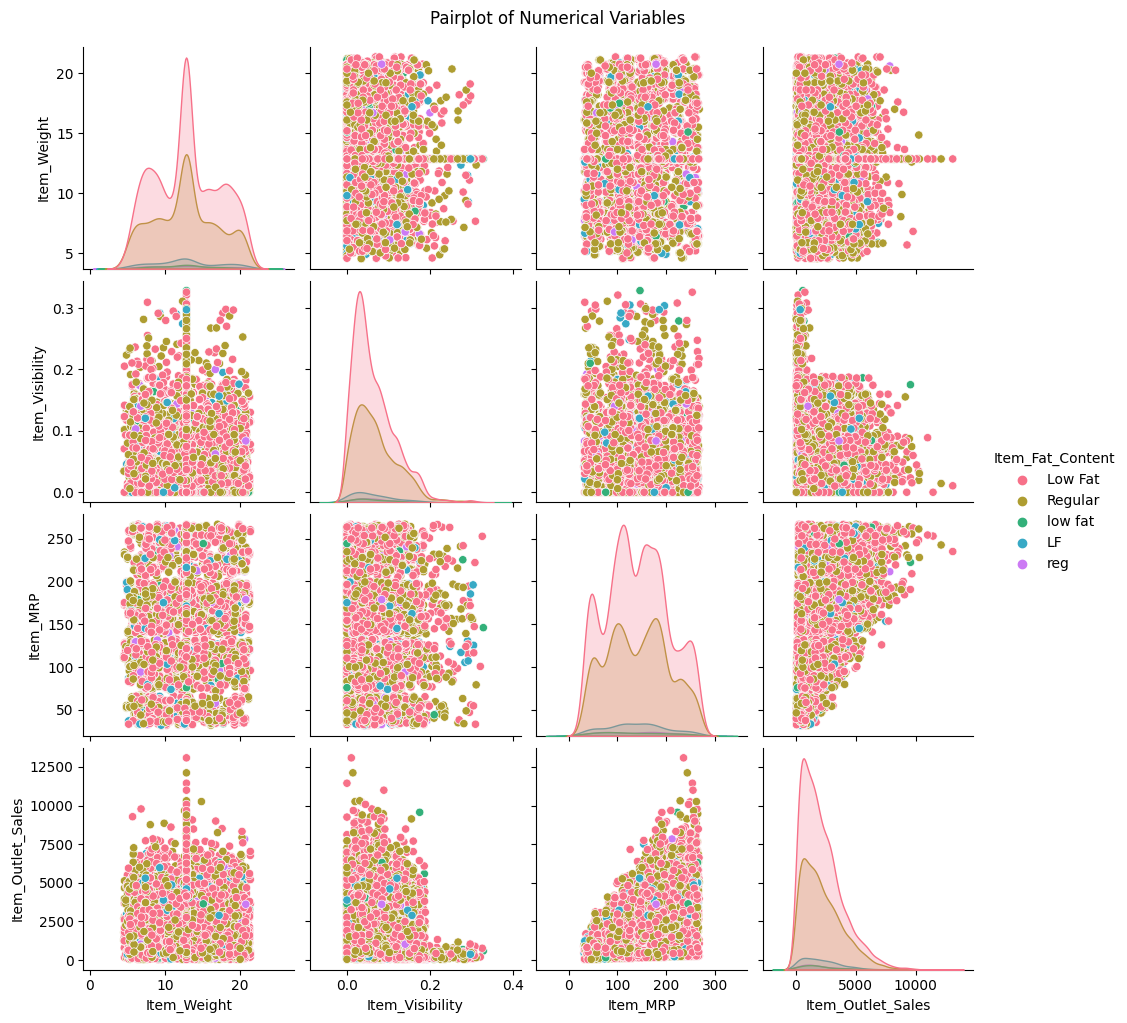

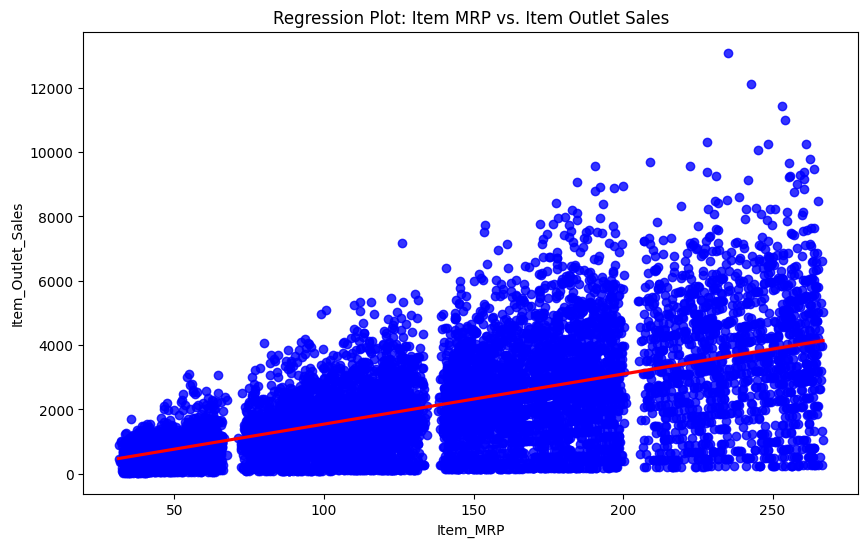

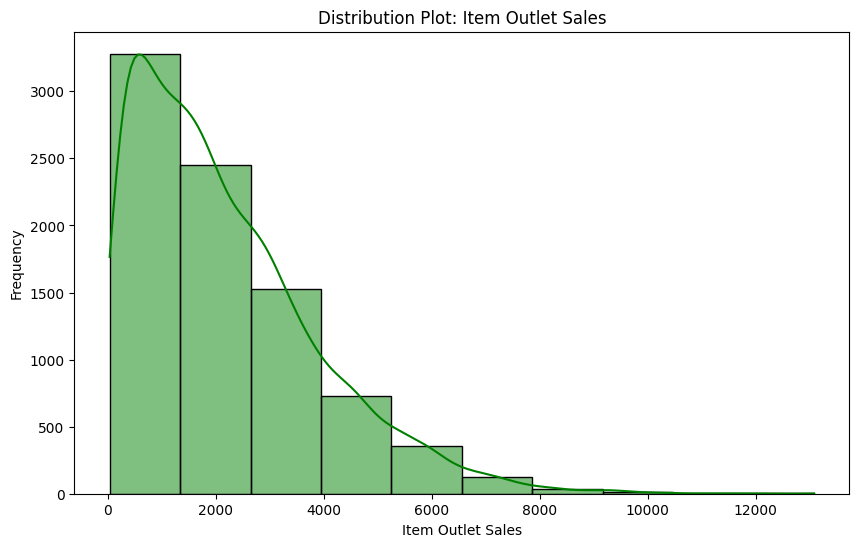

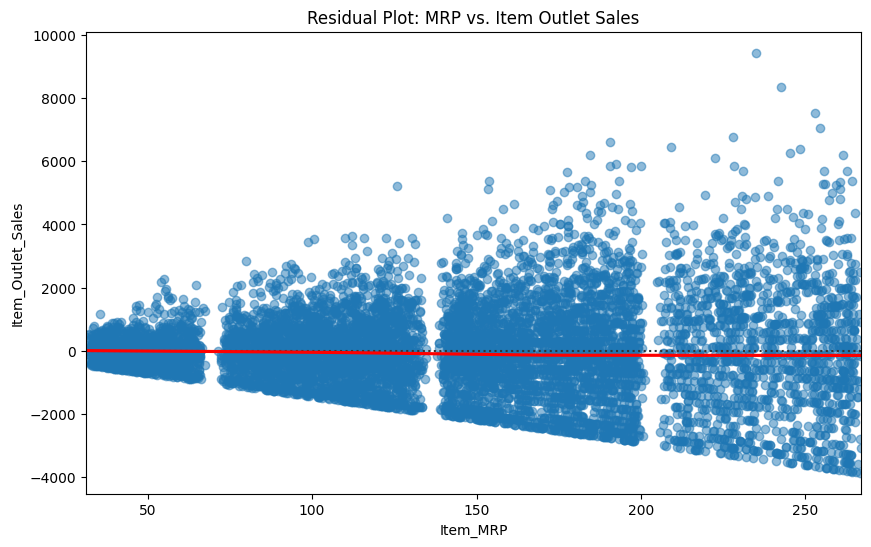

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.DataFrame(train_data_clean)

# 1. Violin Plot: Distribution of Sales by Outlet Type
plt.figure(figsize=(10, 6))
sns.violinplot(x="Outlet_Type", y="Item_Outlet_Sales", data=df, palette="muted")
plt.title("Violin Plot: Item Outlet Sales by Outlet Type")
plt.xticks(rotation=45)
plt.show()

# 2. Pairplot: Pairwise relationships between numerical variables
sns.pairplot(df, vars=["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Outlet_Sales"], hue="Item_Fat_Content", palette="husl")
plt.suptitle("Pairplot of Numerical Variables", y=1.02)
plt.show()

# 3. Regression Plot: MRP vs. Sales
plt.figure(figsize=(10, 6))
sns.regplot(x="Item_MRP", y="Item_Outlet_Sales", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression Plot: Item MRP vs. Item Outlet Sales")
plt.show()

# 4. Distribution Plot: Sales Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df["Item_Outlet_Sales"], kde=True, color="green", bins=10)
plt.title("Distribution Plot: Item Outlet Sales")
plt.xlabel("Item Outlet Sales")
plt.ylabel("Frequency")
plt.show()

# 5. Residual Plot: Residuals of MRP vs. Sales
plt.figure(figsize=(10, 6))
sns.residplot(x="Item_MRP", y="Item_Outlet_Sales", data=df, lowess=True, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title("Residual Plot: MRP vs. Item Outlet Sales")
plt.show()

This Python function cleans a dataset by handling missing values and standardizing categorical data. It begins by displaying the dataset's shape, data types, and missing values. For numerical columns (Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year), missing values are filled with the mean. For categorical columns (Item_Fat_Content, Item_Type, Outlet_Size, etc.), missing values are replaced with the mode. Additionally, the Item_Fat_Content column is standardized by mapping inconsistent labels (e.g., "LF", "low fat") to consistent values like "Low Fat" or "Regular." After cleaning, the function verifies that no missing values remain, ensuring the dataset is ready for analysis.

In [15]:
import pandas as pd
import numpy as np

def handle_missing_values_thoroughly(df):
    df = df.copy()
    
    print("Step 1: Initial Data Info")
    print("-" * 50)
    print("Shape:", df.shape)
    print("\nData Types:")
    print(df.dtypes)
    
    print("\nStep 2: Missing Values Before Handling")
    print("-" * 50)
    missing_values = df.isnull().sum()
    print(missing_values)
    print("\nTotal missing values:", missing_values.sum())
    
    # Handle numerical columns
    numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']
    print("\nStep 3: Handling Numerical Columns")
    print("-" * 50)
    for col in numerical_columns:
        if df[col].isnull().any():
            mean_value = df[col].mean()
            df[col] = df[col].fillna(mean_value)
            print(f"Filled {col} NaN with mean: {mean_value:.4f}")
    
    # Handle categorical columns
    categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 
                         'Outlet_Location_Type', 'Outlet_Type']
    print("\nStep 4: Handling Categorical Columns")
    print("-" * 50)
    for col in categorical_columns:
        if df[col].isnull().any():
            mode_value = df[col].mode()[0]
            df[col] = df[col].fillna(mode_value)
            print(f"Filled {col} NaN with mode: {mode_value}")
    
    # Standardize Item_Fat_Content
    fat_content_map = {
        'reg': 'Regular',
        'regular': 'Regular',
        'LF': 'Low Fat',
        'lf': 'Low Fat',
        'low fat': 'Low Fat'
    }
    df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(fat_content_map)
    
    print("\nStep 5: Final Verification")
    print("-" * 50)
    remaining_nan = df.isnull().sum()
    if remaining_nan.sum() > 0:
        print("Warning: Remaining NaN values:")
        print(remaining_nan[remaining_nan > 0])
    else:
        print("Success: No NaN values remain in the dataset!")
    
    return df

# Clean the test data
print("CLEANING TEST DATA")
print("=" * 50)
test_data_clean = handle_missing_values_thoroughly(test_data)

# Display final cleaned data
print("\nStep 6: Sample of Cleaned Data")
print("-" * 50)
print(test_data_clean)

# Final verification
print("\nStep 7: Final Data Quality Check")
print("-" * 50)
print("Shape:", test_data_clean.shape)
print("Total NaN values:", test_data_clean.isnull().sum().sum())

CLEANING TEST DATA
Step 1: Initial Data Info
--------------------------------------------------
Shape: (5681, 11)

Data Types:
Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

Step 2: Missing Values Before Handling
--------------------------------------------------
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type          

**EDA On Train Data **

This code performs exploratory data analysis (EDA) on a cleaned dataset, focusing on visualizations, statistical summaries, and insights. It includes six subplots: the distribution of sales, sales by item type, outlet type, fat content, and location type, and the correlation between Item_MRP and sales. A heatmap shows correlations among numerical variables, while boxplots detect outliers. Grouped summaries analyze sales by item type and outlet type. Missing values and unique categorical values are examined. A normality test checks if sales follow a normal distribution. Lastly, sales trends by establishment year are visualized, providing insights into patterns and relationships in the data.

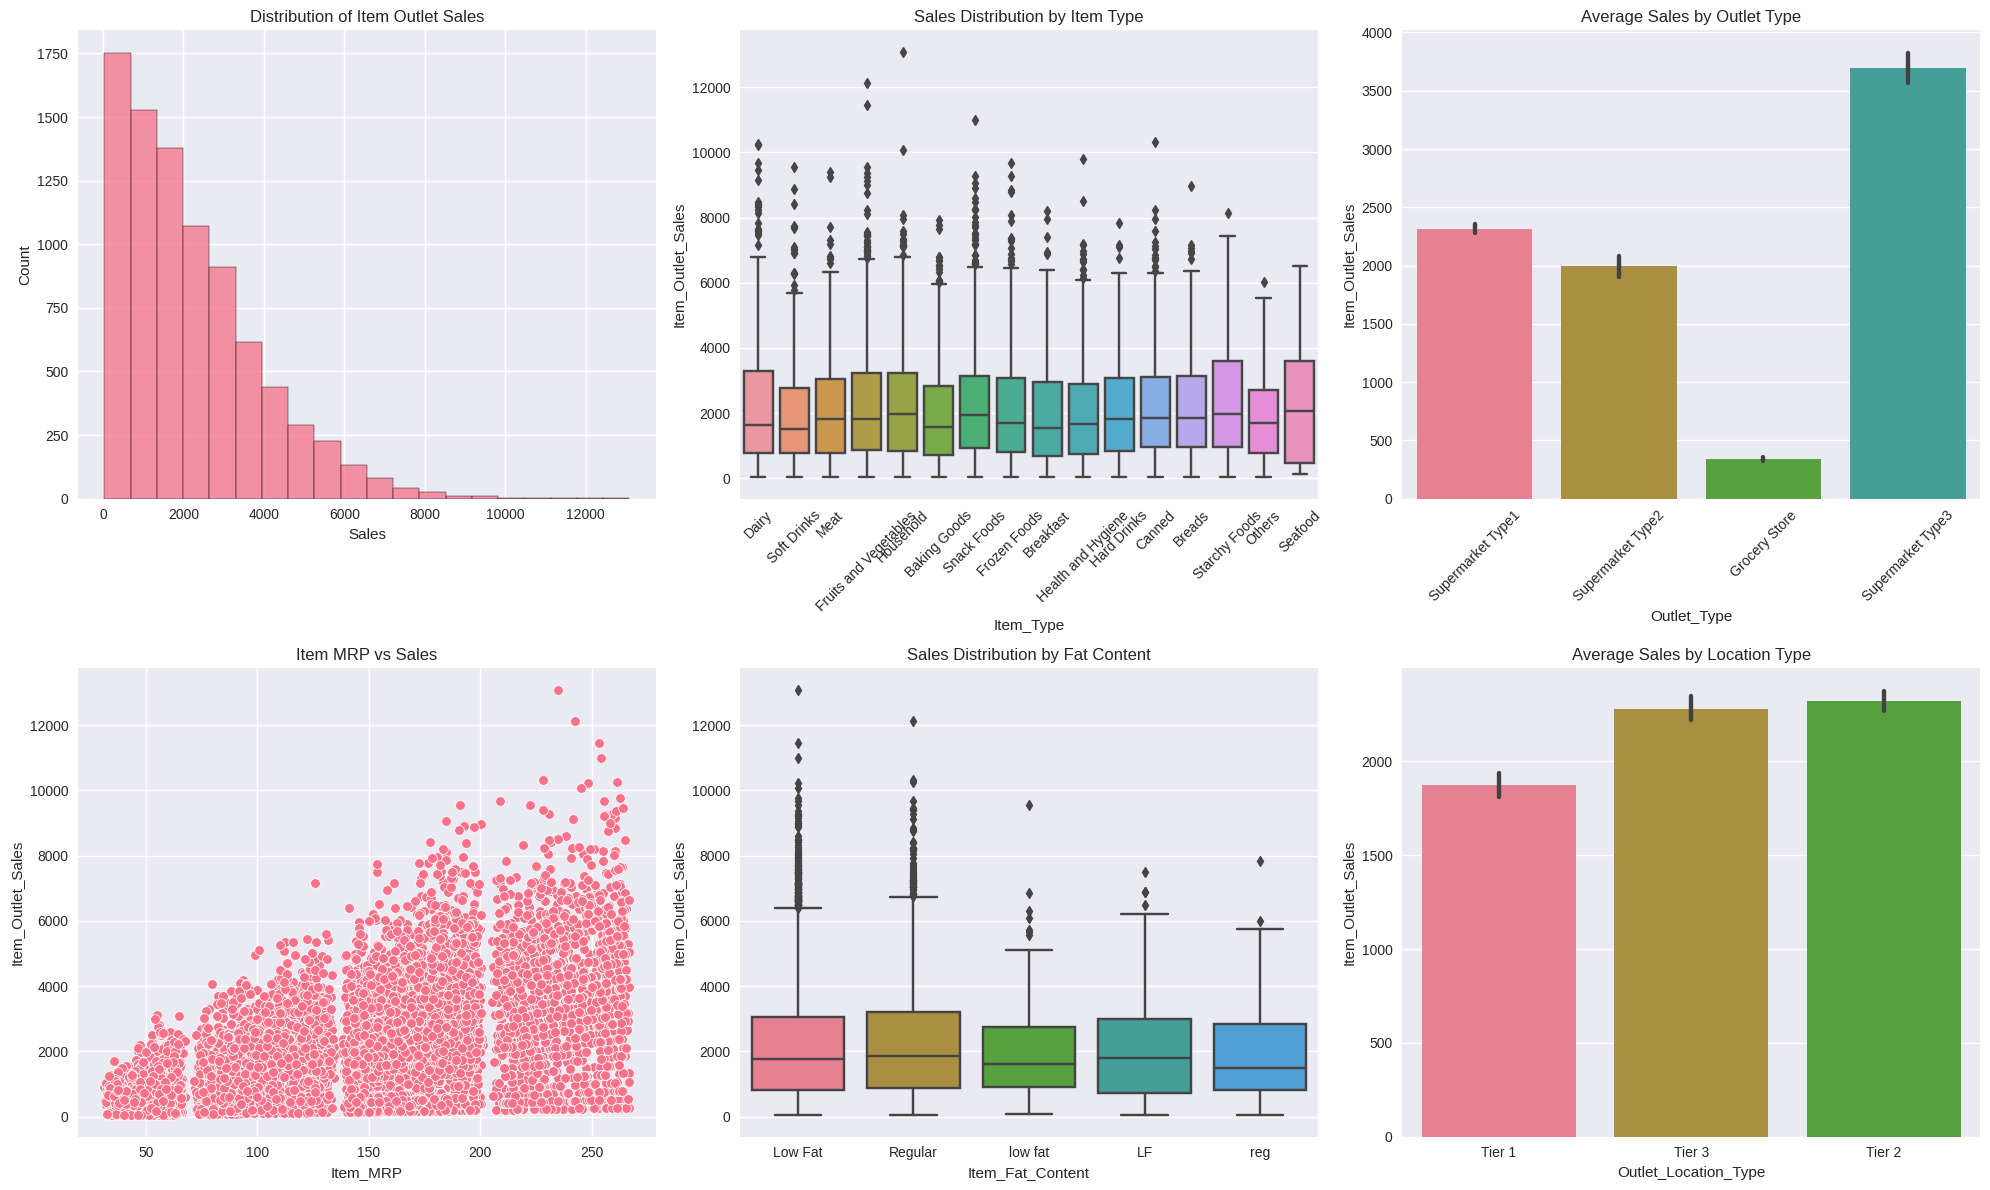


Numerical Summary Statistics:
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.226124         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       9.310000         0.026989    93.826500                1987.000000   
50%      12.857645         0.053931   143.012800                1999.000000   
75%      16.000000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


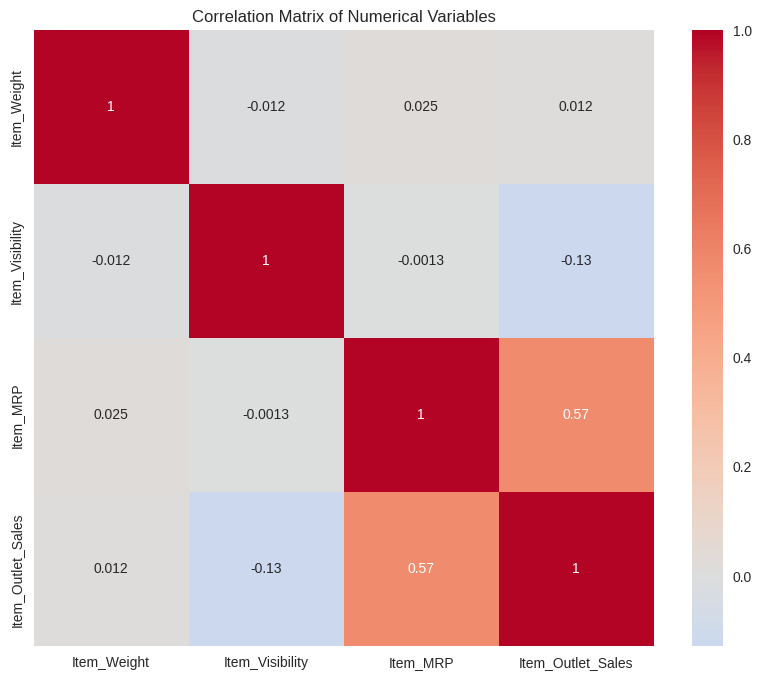


Category-wise Sales Summary:
                              mean  count          std
Item_Type                                             
Baking Goods           1952.971207    648  1546.788045
Breads                 2204.132226    251  1644.235914
Breakfast              2111.808651    110  1911.693586
Canned                 2225.194904    649  1645.235638
Dairy                  2232.542597    682  1884.404698
Frozen Foods           2132.867744    856  1724.777720
Fruits and Vegetables  2289.009592   1232  1799.503459
Hard Drinks            2139.221622    214  1606.191587
Health and Hygiene     2010.000265    520  1553.633063
Household              2258.784300    910  1692.245757
Meat                   2158.977911    425  1695.231081
Others                 1926.139702    169  1431.860471
Seafood                2326.065928     64  1842.988719
Snack Foods            2277.321739   1200  1705.121755
Soft Drinks            2006.511735    445  1674.249752
Starchy Foods          2374.332773 

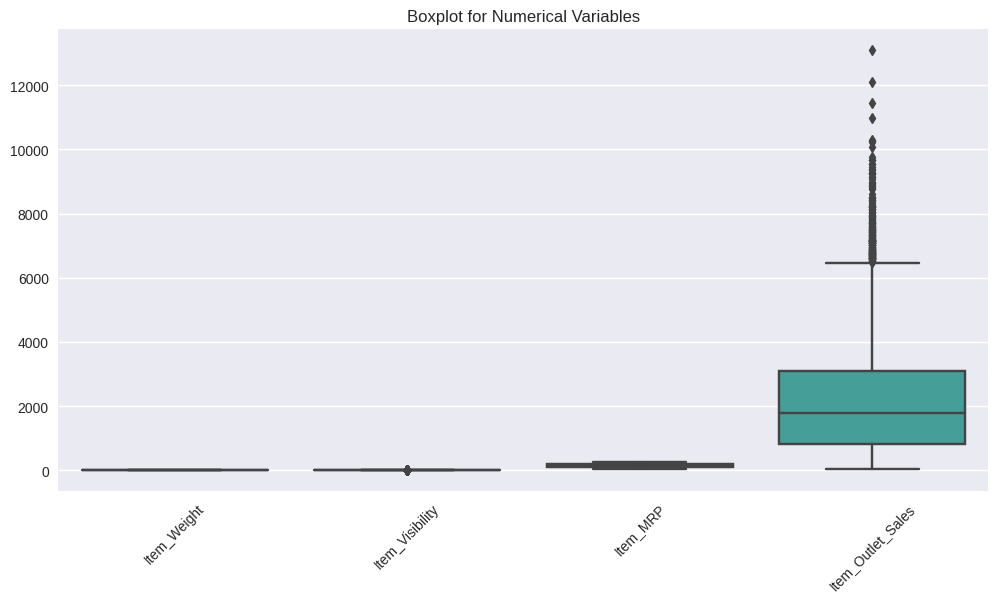

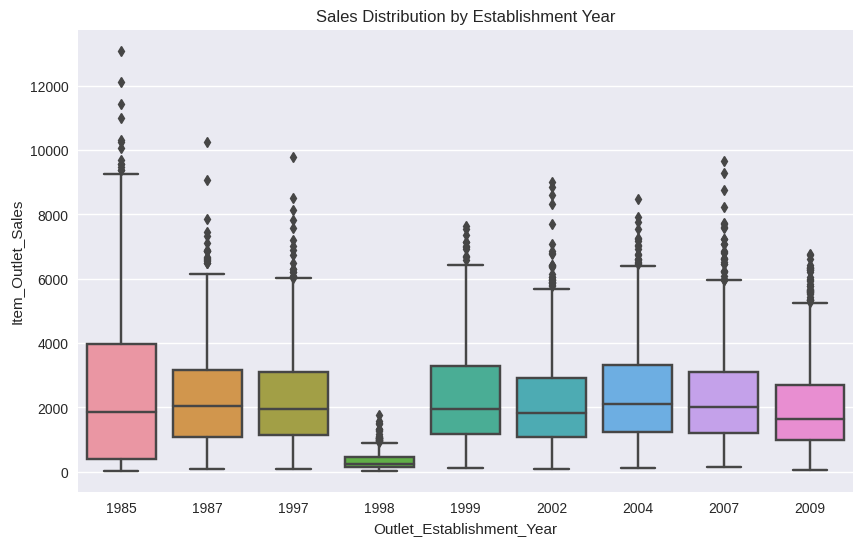

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
# Set up the plotting style
plt.style.use('seaborn')
sns.set_palette("husl")

# Create a figure with multiple subplots
plt.figure(figsize=(20, 12))

# 1. Distribution of Item_Outlet_Sales (Target Variable)
plt.subplot(2, 3, 1)
sns.histplot(data=train_data_clean, x='Item_Outlet_Sales', bins=20)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Sales')
plt.ylabel('Count')

# 2. Sales by Item Type (Box Plot)
plt.subplot(2, 3, 2)
sns.boxplot(data=train_data_clean, x='Item_Type', y='Item_Outlet_Sales')
plt.xticks(rotation=45)
plt.title('Sales Distribution by Item Type')

# 3. Sales by Outlet Type
plt.subplot(2, 3, 3)
sns.barplot(data=train_data_clean, x='Outlet_Type', y='Item_Outlet_Sales')
plt.xticks(rotation=45)
plt.title('Average Sales by Outlet Type')

# 4. Correlation between Item_MRP and Sales
plt.subplot(2, 3, 4)
sns.scatterplot(data=train_data_clean, x='Item_MRP', y='Item_Outlet_Sales')
plt.title('Item MRP vs Sales')

# 5. Sales by Fat Content
plt.subplot(2, 3, 5)
sns.boxplot(data=train_data_clean, x='Item_Fat_Content', y='Item_Outlet_Sales')
plt.title('Sales Distribution by Fat Content')

# 6. Sales by Outlet Location Type
plt.subplot(2, 3, 6)
sns.barplot(data=train_data_clean, x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.title('Average Sales by Location Type')

plt.tight_layout()
plt.show()

# Numerical Analysis
print("\nNumerical Summary Statistics:")
print(train_data_clean.describe())

# Correlation Analysis
numerical_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
correlation_matrix = train_data_clean[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Additional Analysis
print("\nCategory-wise Sales Summary:")
print(train_data_clean.groupby('Item_Type')['Item_Outlet_Sales'].agg(['mean', 'count', 'std']))

print("\nOutlet Type Analysis:")
print(train_data_clean.groupby('Outlet_Type')['Item_Outlet_Sales'].agg(['mean', 'count', 'std']))

# Missing Values Analysis
print("\nMissing Values Analysis:")
print(train_data_clean.isnull().sum())

# Unique Values in Categorical Columns
categorical_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
print("\nUnique Values in Categorical Columns:")
for col in categorical_columns:
    print(f"\n{col}:")
    print(train_data_clean[col].value_counts())

# Statistical Tests
# Test for normality of Sales
_, p_value = stats.normaltest(train_data_clean['Item_Outlet_Sales'])
print(f"\nNormality Test for Sales (p-value): {p_value}")

# Create box plot for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data_clean[numerical_columns])
plt.title('Boxplot for Numerical Variables')
plt.xticks(rotation=45)
plt.show()

# Additional insights about the establishment year
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data_clean, x='Outlet_Establishment_Year', y='Item_Outlet_Sales')
plt.title('Sales Distribution by Establishment Year')
plt.show()

The code provides a comprehensive analysis of the train_data_clean dataset. It starts with basic dataset information, summary statistics, and missing value checks. Categorical variables like Item_Fat_Content, Item_Type, and Outlet_Type are analyzed for their distributions. Visualizations include the sales distribution, MRP vs. sales scatterplot, average sales by item type, and average sales by outlet type, offering insights into key patterns. A correlation heatmap highlights relationships between numerical variables like Item_Weight, Item_Visibility, Item_MRP, and Item_Outlet_Sales. Key insights such as average, maximum, and minimum sales, along with the MRP range, are also summarized effectively.

1. Basic Dataset Information:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1)

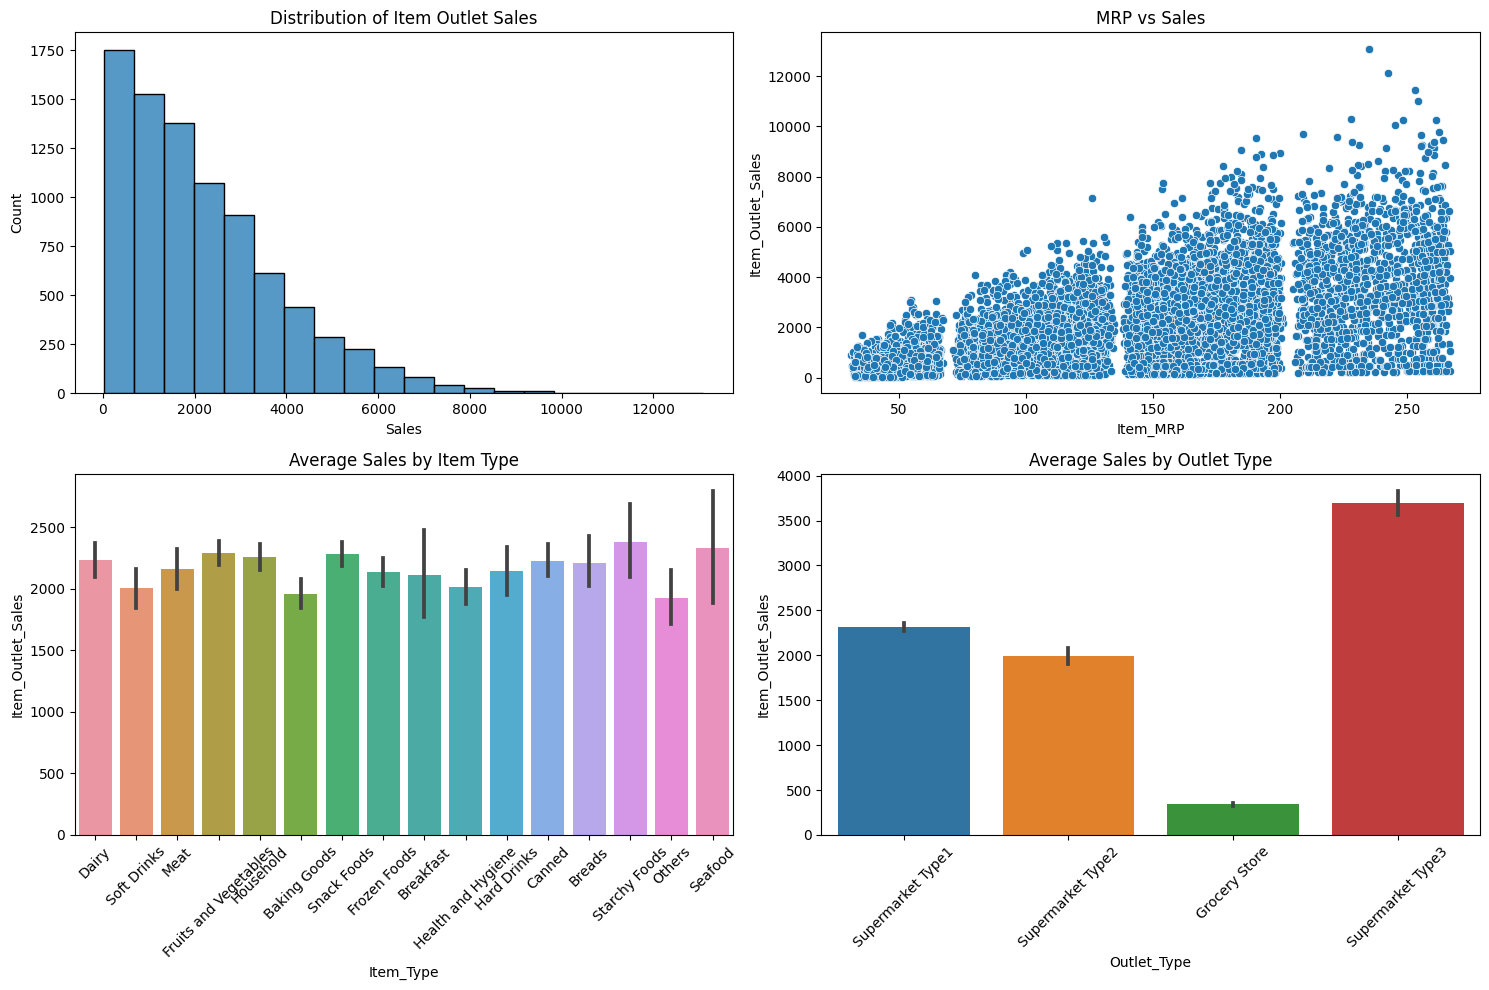

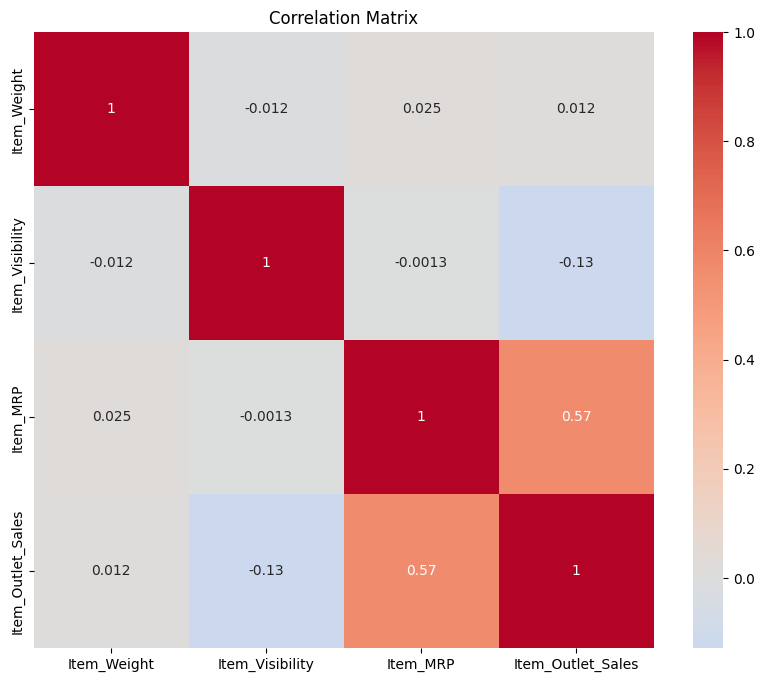


5. Key Insights:
--------------------------------------------------
Average Sales: 2181.29
Maximum Sales: 13086.96
Minimum Sales: 33.29

MRP Range: 31.29 - 266.89


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Create train_data_clean


# 1. Basic Information
print("1. Basic Dataset Information:")
print("-" * 50)
print(train_data_clean.info())
print("\n2. Summary Statistics:")
print("-" * 50)
print(train_data_clean.describe())

# 3. Check for missing values
print("\n3. Missing Values:")
print("-" * 50)
print(train_data_clean.isnull().sum())

# 4. Categorical Variables Analysis
print("\n4. Categorical Variables Distribution:")
print("-" * 50)
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size']
for col in categorical_cols:
    print(f"\n{col} Distribution:")
    print(train_data_clean[col].value_counts())

# 5. Create visualizations
plt.figure(figsize=(15, 10))

# Sales Distribution
plt.subplot(2, 2, 1)
sns.histplot(train_data_clean['Item_Outlet_Sales'], bins=20)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Sales')

# MRP vs Sales
plt.subplot(2, 2, 2)
sns.scatterplot(data=train_data_clean, x='Item_MRP', y='Item_Outlet_Sales')
plt.title('MRP vs Sales')

# Sales by Item Type
plt.subplot(2, 2, 3)
sns.barplot(data=train_data_clean, x='Item_Type', y='Item_Outlet_Sales')
plt.xticks(rotation=45)
plt.title('Average Sales by Item Type')

# Sales by Outlet Type
plt.subplot(2, 2, 4)
sns.barplot(data=train_data_clean, x='Outlet_Type', y='Item_Outlet_Sales')
plt.xticks(rotation=45)
plt.title('Average Sales by Outlet Type')

plt.tight_layout()
plt.show()

# 6. Correlation Analysis
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
correlation = train_data_clean[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# 7. Additional insights
print("\n5. Key Insights:")
print("-" * 50)
print(f"Average Sales: {train_data_clean['Item_Outlet_Sales'].mean():.2f}")
print(f"Maximum Sales: {train_data_clean['Item_Outlet_Sales'].max():.2f}")
print(f"Minimum Sales: {train_data_clean['Item_Outlet_Sales'].min():.2f}")
print(f"\nMRP Range: {train_data_clean['Item_MRP'].min():.2f} - {train_data_clean['Item_MRP'].max():.2f}")

This code performs a detailed analysis of numerical and categorical variables in a cleaned dataset. It calculates key statistics (mean, median, standard deviation, min, max, range) for numerical columns like Item_Weight, Item_Visibility, Item_MRP, and Item_Outlet_Sales. For categorical variables (Item_Fat_Content, Item_Type, etc.), it displays value counts and unique values. Correlation analysis identifies relationships between numerical variables and Item_Outlet_Sales. Missing values are checked and reported. Visualizations include the sales distribution, Item_MRP vs. sales scatterplot, average sales by item type, and a correlation heatmap. This comprehensive analysis provides insights into data patterns, relationships, and potential modeling features.

1. DETAILED SUMMARY STATISTICS FOR NUMERICAL VARIABLES
--------------------------------------------------------------------------------
  Statistic  Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
0      Mean      12.8576           0.0661  140.9928          2181.2889
1    Median      12.8576           0.0539  143.0128          1794.3310
2   Std Dev       4.2261           0.0516   62.2751          1706.4996
3       Min       4.5550           0.0000   31.2900            33.2900
4       Max      21.3500           0.3284  266.8884         13086.9648
5     Range      16.7950           0.3284  235.5984         13053.6748

2. CATEGORICAL VARIABLES ANALYSIS
--------------------------------------------------------------------------------

Item_Fat_Content Distribution:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
Unique values: 5

Item_Type Distribution:
Item_Type
Fruits and Vegetables    1232
Snack Foods   

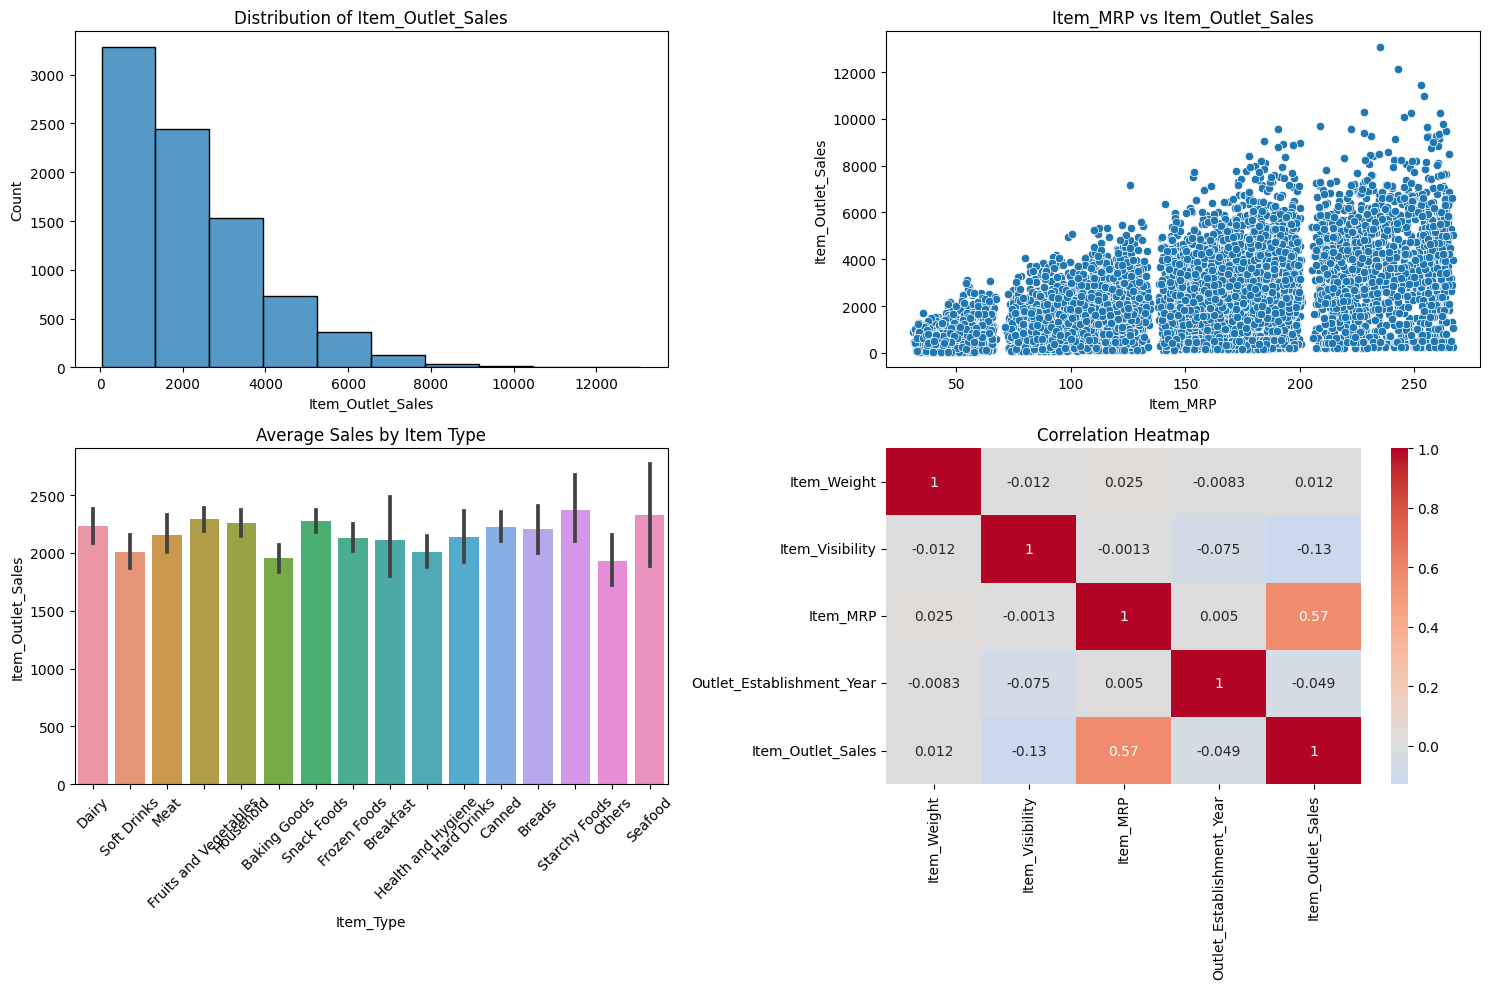

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Create train_data_clean

# 1. Basic Statistics for Numerical Variables
numerical_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

print("1. DETAILED SUMMARY STATISTICS FOR NUMERICAL VARIABLES")
print("-" * 80)
stats_df = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Std Dev', 'Min', 'Max', 'Range'],
    'Item_Weight': [
        train_data_clean['Item_Weight'].mean(),
        train_data_clean['Item_Weight'].median(),
        train_data_clean['Item_Weight'].std(),
        train_data_clean['Item_Weight'].min(),
        train_data_clean['Item_Weight'].max(),
        train_data_clean['Item_Weight'].max() - train_data_clean['Item_Weight'].min()
    ],
    'Item_Visibility': [
        train_data_clean['Item_Visibility'].mean(),
        train_data_clean['Item_Visibility'].median(),
        train_data_clean['Item_Visibility'].std(),
        train_data_clean['Item_Visibility'].min(),
        train_data_clean['Item_Visibility'].max(),
        train_data_clean['Item_Visibility'].max() - train_data_clean['Item_Visibility'].min()
    ],
    'Item_MRP': [
        train_data_clean['Item_MRP'].mean(),
        train_data_clean['Item_MRP'].median(),
        train_data_clean['Item_MRP'].std(),
        train_data_clean['Item_MRP'].min(),
        train_data_clean['Item_MRP'].max(),
        train_data_clean['Item_MRP'].max() - train_data_clean['Item_MRP'].min()
    ],
    'Item_Outlet_Sales': [
        train_data_clean['Item_Outlet_Sales'].mean(),
        train_data_clean['Item_Outlet_Sales'].median(),
        train_data_clean['Item_Outlet_Sales'].std(),
        train_data_clean['Item_Outlet_Sales'].min(),
        train_data_clean['Item_Outlet_Sales'].max(),
        train_data_clean['Item_Outlet_Sales'].max() - train_data_clean['Item_Outlet_Sales'].min()
    ]
})

print(stats_df.round(4))

# 2. Categorical Variables Analysis
print("\n2. CATEGORICAL VARIABLES ANALYSIS")
print("-" * 80)
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Type', 'Outlet_Location_Type']
for col in categorical_cols:
    print(f"\n{col} Distribution:")
    print(train_data_clean[col].value_counts())
    print(f"Unique values: {train_data_clean[col].nunique()}")

# 3. Correlation Analysis
print("\n3. CORRELATION ANALYSIS")
print("-" * 80)
correlation_matrix = train_data_clean[numerical_cols].corr()
print("\nCorrelation with Item_Outlet_Sales:")
print(correlation_matrix['Item_Outlet_Sales'].sort_values(ascending=False))

# 4. Missing Values Analysis
print("\n4. MISSING VALUES ANALYSIS")
print("-" * 80)
missing_values = train_data_clean.isnull().sum()
print("\nMissing Values Count:")
print(missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values found")

# 5. Create visualizations
plt.figure(figsize=(15, 10))

# Sales Distribution
plt.subplot(2, 2, 1)
sns.histplot(data=train_data_clean, x='Item_Outlet_Sales', bins=10)
plt.title('Distribution of Item_Outlet_Sales')

# MRP vs Sales
plt.subplot(2, 2, 2)
sns.scatterplot(data=train_data_clean, x='Item_MRP', y='Item_Outlet_Sales')
plt.title('Item_MRP vs Item_Outlet_Sales')

# Sales by Item Type
plt.subplot(2, 2, 3)
sns.barplot(data=train_data_clean, x='Item_Type', y='Item_Outlet_Sales')
plt.xticks(rotation=45)
plt.title('Average Sales by Item Type')

# Correlation Heatmap
plt.subplot(2, 2, 4)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

The code preprocesses the train_data_clean and test_data_clean datasets by handling missing values, scaling the target variable, and engineering features like MRP_Per_Type and Outlet_Years. Categorical variables are encoded using LabelEncoder. Three models—XGBoost, LightGBM, and CatBoost—are trained using cross-validation, with RMSE scores calculated for each. Final predictions are made using a weighted ensemble of the models, with weights assigned as 0.3 for XGBoost and LightGBM, and 0.4 for CatBoost. Predictions are rescaled to the original scale, split into public and private datasets, and saved as a submission file (submission.csv) for further evaluation.

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, train_test_split
import xgboost as xgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')

def preprocess_data(df, is_training=True, encoders=None):
    data = df.copy()

    # Fill missing values
    data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
    data['Outlet_Size'].fillna('Medium', inplace=True)

    # Scale target variable (divide by 3000 to get to 0.27-0.89 range)
    if is_training and 'Item_Outlet_Sales' in data.columns:
        data['Item_Outlet_Sales'] = data['Item_Outlet_Sales'] / 3000.0

    # Feature engineering
    data['Item_Visibility'] = np.log1p(data['Item_Visibility'])
    data['Item_MRP'] = np.log1p(data['Item_MRP'])
    data['MRP_Per_Type'] = data.groupby('Item_Type')['Item_MRP'].transform('mean')
    data['Sales_Per_Type'] = data.groupby('Outlet_Type')['Item_MRP'].transform('mean')
    data['Price_Per_Weight'] = data['Item_MRP'] / data['Item_Weight']
    data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']

    if is_training:
        encoders = {}
        categorical_columns = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type',
                               'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
                               'Outlet_Type']
        for col in categorical_columns:
            encoders[col] = LabelEncoder()
            data[col] = encoders[col].fit_transform(data[col])
    else:
        for col, encoder in encoders.items():
            data[col] = data[col].map(lambda x: x if x in encoder.classes_ else encoder.classes_[0])
            data[col] = encoder.transform(data[col])

    return data, encoders

# Model parameters
xgb_params = {
    'n_estimators': 1000,
    'max_depth': 7,
    'learning_rate': 0.01,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'min_child_weight': 3
}

lgb_params = {
    'n_estimators': 1000,
    'max_depth': 7,
    'learning_rate': 0.01,
    'num_leaves': 31,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'min_child_samples': 20
}

cat_params = {
    'iterations': 1000,
    'depth': 7,
    'learning_rate': 0.01,
    'l2_leaf_reg': 3,
    'subsample': 0.8,
    'random_strength': 1,
    'verbose': False
}

# Create and train models
models = {
    'XGBoost': xgb.XGBRegressor(**xgb_params),
    'LightGBM': LGBMRegressor(**lgb_params),
    'CatBoost': CatBoostRegressor(**cat_params)
}

# Preprocess data
train_processed, encoders = preprocess_data(train_data_clean, is_training=True)
test_processed, _ = preprocess_data(test_data_clean, is_training=False, encoders=encoders)

# Prepare features
features = [col for col in train_processed.columns if col != 'Item_Outlet_Sales']
X = train_processed[features]
y = train_processed['Item_Outlet_Sales']

# Cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
cv_scores = {}

for name, model in models.items():
    scores = []
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        scores.append(rmse)

    cv_scores[name] = scores
    print(f"{name:<10}: {scores}, Mean: {np.mean(scores):.4f}")

# Train final models and make predictions
predictions = {}
for name, model in models.items():
    model.fit(X, y)
    predictions[name] = model.predict(test_processed[features])

# Ensemble predictions (weighted average)
weights = {
    'XGBoost': 0.3,
    'LightGBM': 0.3,
    'CatBoost': 0.4
}

final_predictions = np.zeros(len(test_processed))
for name, preds in predictions.items():
    final_predictions += weights[name] * preds

# Rescale predictions back to original scale
final_predictions = final_predictions * 3000.0

# Public and Private Split
test_public, test_private = train_test_split(test_data_clean, test_size=0.75, random_state=42)

# Create submission file
submission_public = test_public[['Item_Identifier', 'Outlet_Identifier']].copy()
submission_public['Item_Outlet_Sales'] = final_predictions[:len(test_public)]

submission_private = test_private[['Item_Identifier', 'Outlet_Identifier']].copy()
submission_private['Item_Outlet_Sales'] = final_predictions[len(test_public):]

# Combine Public and Private predictions
submission = pd.concat([submission_public, submission_private])

# Save to CSV
submission.to_csv('submission.csv', index=False)

print("\nSubmission file 'submission.csv' created successfully!")

XGBoost   : [0.3665063291770937, 0.37211450166761506, 0.3888736716768486], Mean: 0.3758
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004646 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1327
[LightGBM] [Info] Number of data points in the train set: 5682, number of used features: 15
[LightGBM] [Info] Start training from score 0.737924
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

The code generates insightful visualizations for model evaluation and analysis. It starts with an Actual vs. Predicted Sales scatterplot, comparing model predictions to actual sales. A feature importance barplot (XGBoost) highlights the most influential features. The distribution plot of predicted sales visualizes their spread and frequency. A boxplot shows predicted sales by Outlet_Type, revealing variations across outlet categories. If applicable, a time-series plot compares actual and predicted sales over Outlet_Years. Finally, an ensemble model weights barplot illustrates the contribution of each model (XGBoost, LightGBM, CatBoost) to the ensemble, providing a comprehensive understanding of model performance and predictions.

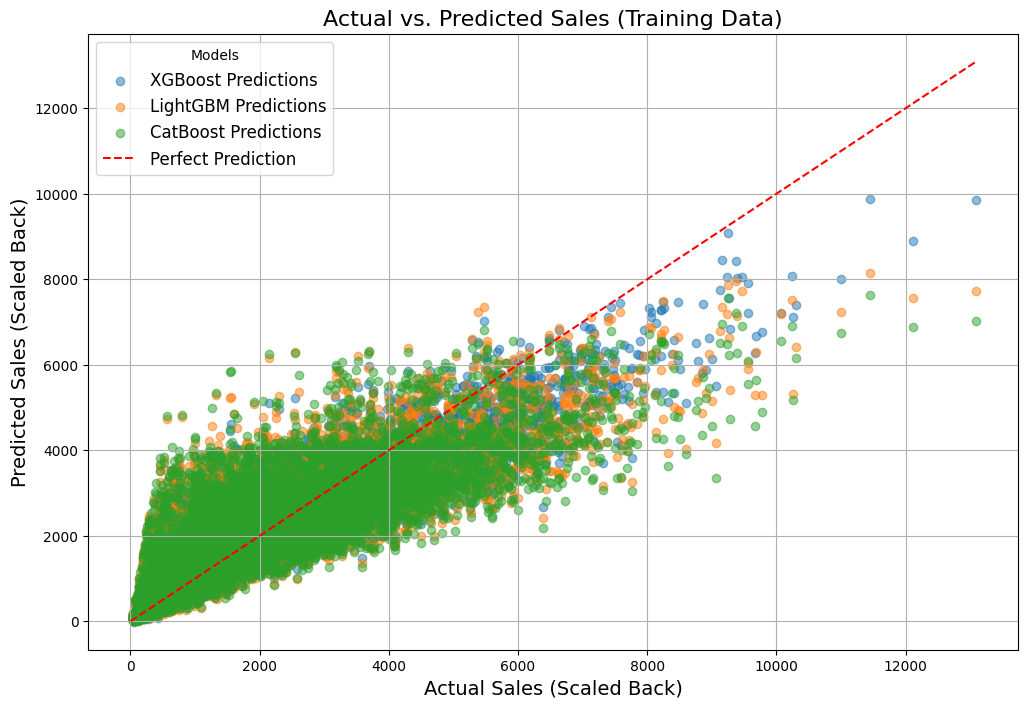

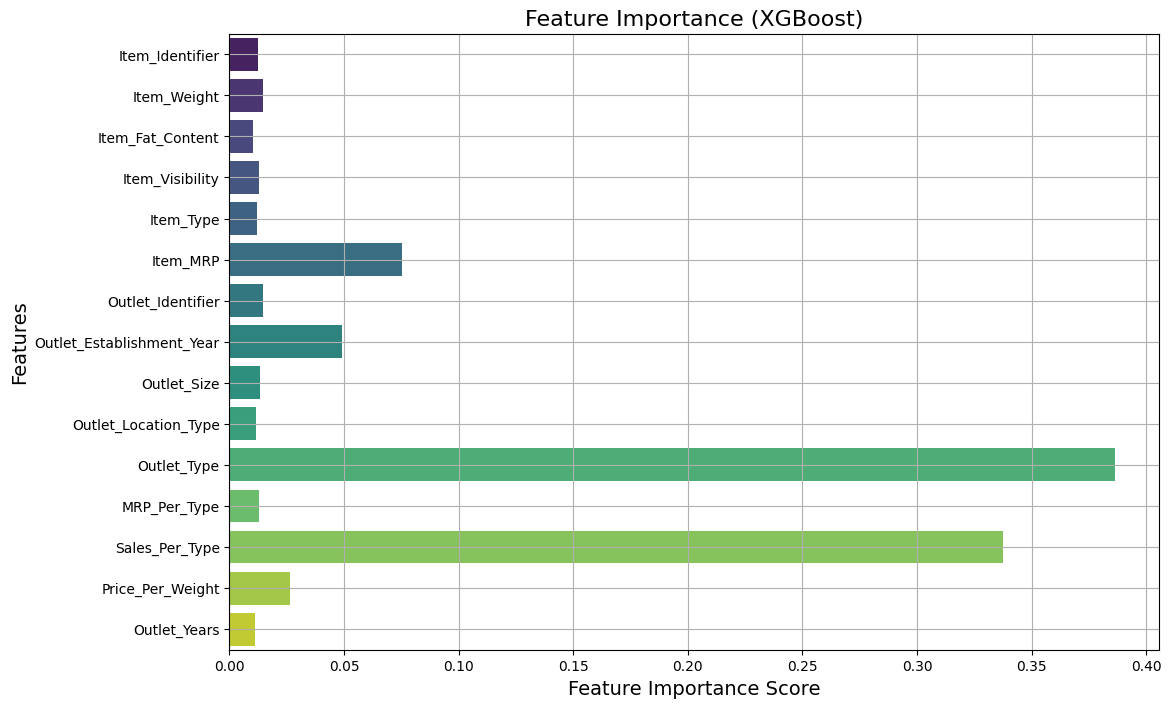

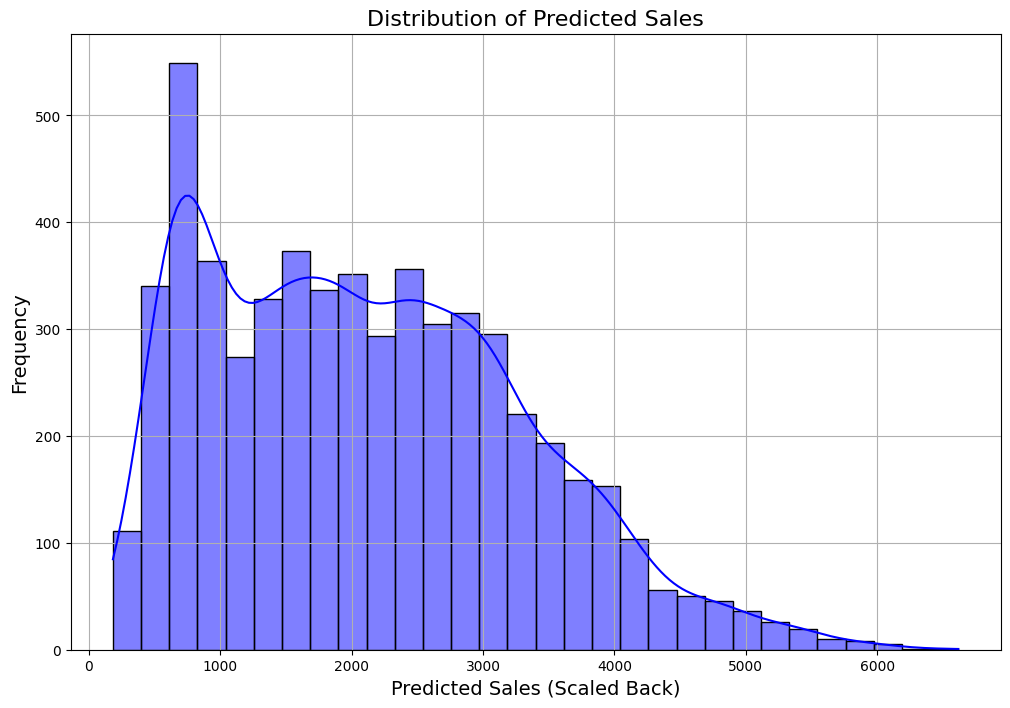

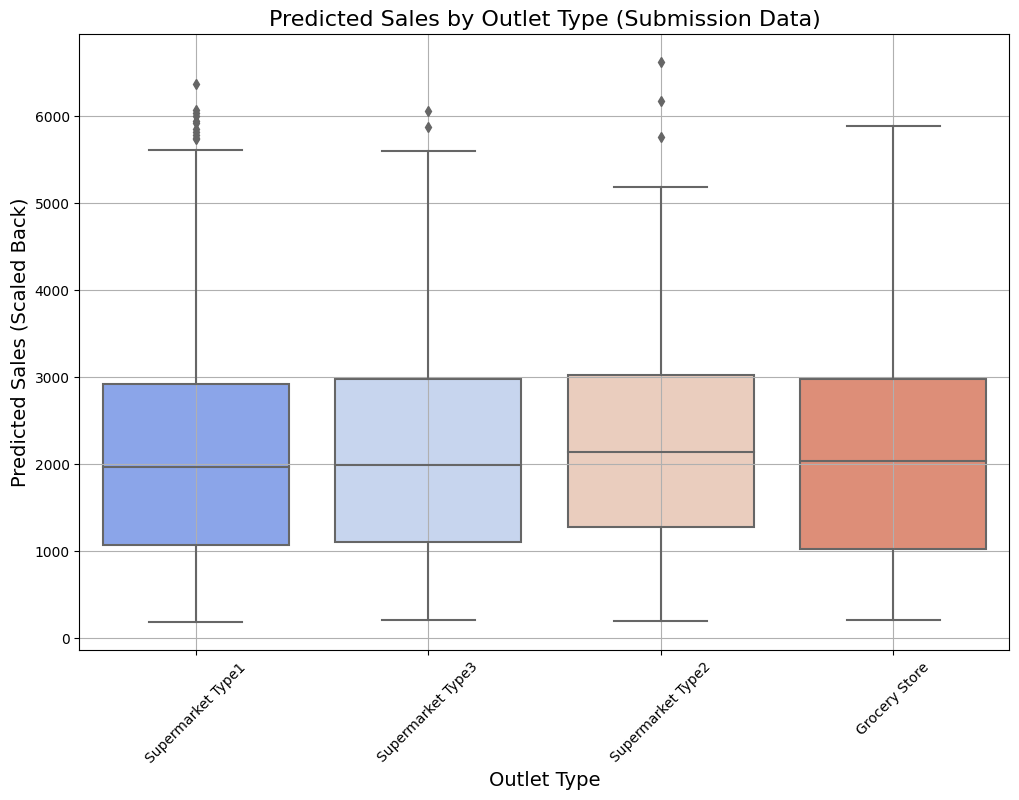

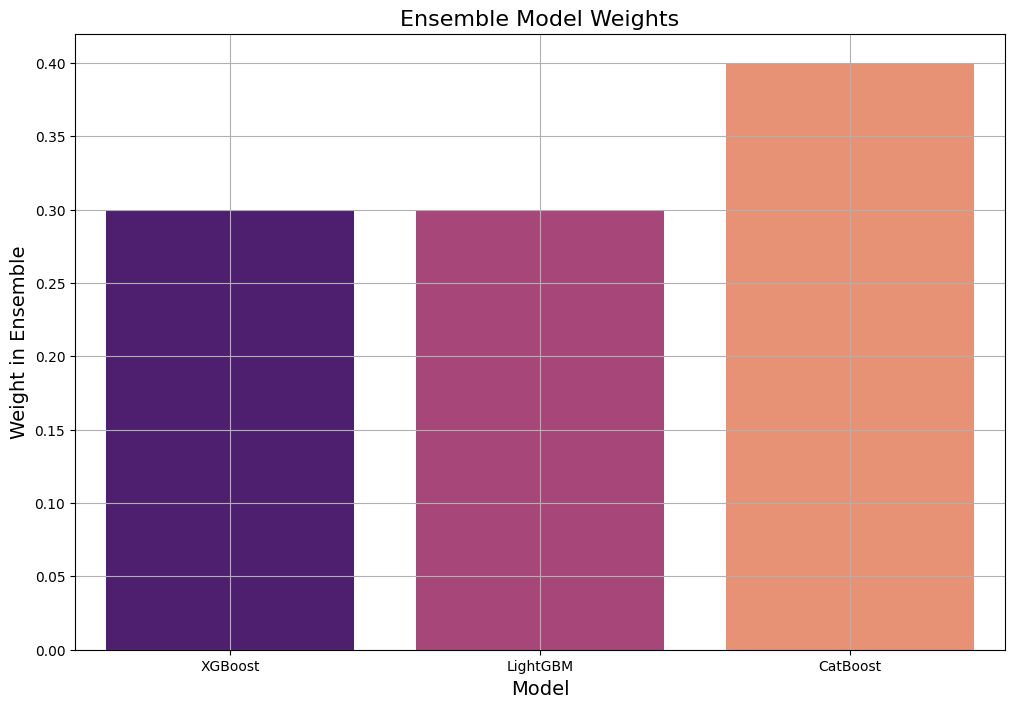

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Actual vs. Predicted Sales (Training Data)
plt.figure(figsize=(12, 8))
for name, model in models.items():
    y_pred = model.predict(X)
    plt.scatter(y * 3000, y_pred * 3000, alpha=0.5, label=f'{name} Predictions')

plt.plot([0, max(y * 3000)], [0, max(y * 3000)], color='red', linestyle='--', label='Perfect Prediction')
plt.title("Actual vs. Predicted Sales (Training Data)", fontsize=16)
plt.xlabel("Actual Sales (Scaled Back)", fontsize=14)
plt.ylabel("Predicted Sales (Scaled Back)", fontsize=14)
plt.legend(fontsize=12, title="Models")
plt.grid(True)
plt.show()

# 2. Feature Importance (XGBoost)
xgb_model = models['XGBoost']
xgb_model.fit(X, y)
xgb_importance = xgb_model.feature_importances_

plt.figure(figsize=(12, 8))
sns.barplot(x=xgb_importance, y=features, palette="viridis")
plt.title("Feature Importance (XGBoost)", fontsize=16)
plt.xlabel("Feature Importance Score", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.grid(True)
plt.show()

# 3. Distribution of Predicted Sales
plt.figure(figsize=(12, 8))
sns.histplot(final_predictions, kde=True, color='blue', bins=30)
plt.title("Distribution of Predicted Sales", fontsize=16)
plt.xlabel("Predicted Sales (Scaled Back)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)
plt.show()

# 4. Submission Graph: Predicted Sales by Outlet Type
submission['Outlet_Type'] = test_data_clean['Outlet_Type']  # Add Outlet_Type back for analysis
plt.figure(figsize=(12, 8))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=submission, palette="coolwarm")
plt.title("Predicted Sales by Outlet Type (Submission Data)", fontsize=16)
plt.xlabel("Outlet Type", fontsize=14)
plt.ylabel("Predicted Sales (Scaled Back)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 5. Time-Series Forecasting (if applicable)
if 'Outlet_Years' in train_data_clean.columns:
    plt.figure(figsize=(12, 8))
    train_data_clean['Predicted_Sales'] = xgb_model.predict(X) * 3000
    sns.lineplot(x='Outlet_Years', y='Item_Outlet_Sales', data=train_data_clean, label='Actual Sales', marker='o', color='blue')
    sns.lineplot(x='Outlet_Years', y='Predicted_Sales', data=train_data_clean, label='Predicted Sales', marker='o', color='orange')
    plt.title("Sales Over Time (Actual vs. Predicted)", fontsize=16)
    plt.xlabel("Outlet Years", fontsize=14)
    plt.ylabel("Sales (Scaled Back)", fontsize=14)
    plt.legend(fontsize=12, title="Legend")
    plt.grid(True)
    plt.show()

# 6. Ensemble Model Comparison
plt.figure(figsize=(12, 8))
ensemble_weights = pd.DataFrame.from_dict(weights, orient='index', columns=['Weight'])
sns.barplot(x=ensemble_weights.index, y=ensemble_weights['Weight'], palette="magma")
plt.title("Ensemble Model Weights", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("Weight in Ensemble", fontsize=14)
plt.grid(True)
plt.show()